In [162]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
from datetime import datetime, timedelta

import seaborn as sns

from matplotlib import rcParams

LoadDatas
-----
- excel data structure
    - column.row
    - col.0 : B1
    - col.1 : B1_1_동
    - col.2 : B1_1_호수
    - col.3:end : timeslot

In [2]:
xlsx = pd.read_excel('datas.xlsx', 
                    header = None, 
                    skiprows = 2,
                    engine = 'openpyxl')

data_startcol = 7
ogDatasObj = {}
for col in xlsx:
    if col >= data_startcol: # startcol 7
        ogDatasObj[f'{xlsx[col][0]}-{xlsx[col][1]}-{xlsx[col][2]}'] = xlsx[col][3:]

ogDatas = pd.DataFrame(ogDatasObj)
ogDatas = ogDatas.fillna(0)
ogDatas = ogDatas.reset_index()
del ogDatas['index']

pd.set_option('display.max_row', 20)
pd.set_option('display.max_columns', 100)

ogDatas

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,아파트1-103-502,아파트1-103-1602,아파트1-103-301,아파트1-103-1502,아파트1-103-202,아파트1-102-903,아파트1-102-603,아파트1-102-203,아파트1-102-704,아파트1-102-703,아파트1-102-403,아파트1-102-303,아파트1-101-604,아파트1-101-1602,아파트1-101-1002,아파트1-101-1202,아파트1-101-1604,아파트1-101-402,아파트1-101-303,아파트1-101-502,아파트1-101-1403,아파트1-101-904,아파트1-101-1502,아파트1-101-1102,아파트1-101-901,아파트1-101-704,아파트1-101-504,아파트1-102-104,아파트1-102-301,아파트1-102-1501,아파트1-102-1602,아파트1-102-1002,아파트1-102-401,아파트1-102-802,아파트1-102-801,아파트1-103-505,아파트1-103-1805,아파트1-103-1306,아파트1-103-1806,아파트1-103-803,...,아파트4-103-609,아파트4-103-707,아파트4-103-101,아파트4-102-803,아파트4-101-1501,아파트4-103-404,아파트4-103-909,아파트4-101-1203,아파트4-103-806,아파트4-103-1410,아파트4-103-402,아파트4-103-703,아파트4-103-106,아파트4-103-910,아파트4-102-402,아파트4-103-907,아파트4-103-1406,아파트4-103-1006,아파트4-103-608,아파트4-103-403,아파트4-105-1102,아파트4-103-804,아파트4-103-103,아파트4-103-706,아파트4-104-1001,아파트4-105-103,아파트4-102-401,아파트4-103-1104,아파트4-103-906,아파트4-103-606,아파트4-103-1307,아파트4-103-410,아파트4-103-1309,아파트4-102-102,아파트4-103-508,아파트4-105-1104,아파트4-102-1402,아파트4-103-407,아파트4-103-1206,아파트4-103-108,아파트4-105-102,아파트4-103-1102,아파트4-105-601,아파트4-104-1501,아파트4-103-702,아파트4-102-104,아파트4-103-902,아파트4-101-602,아파트4-103-905,아파트4-101-104
0,0.085,0.016,0.052,0.003,0.032,0.074,0.053,0.096,0.105,0.042,0.149,0.039,0.054,0.132,0.091,0.169,0.051,0.118,0.060,0.047,0.047,0.053,0.046,0.104,0.079,0.092,0.043,0.069,0.139,0.026,0.146,0.092,0.025,0.127,0.045,0.042,0.113,0.207,0.030,0.171,0.045,0.064,0.045,0.277,0.186,0.142,0.132,0.034,0.088,0.041,...,0.041,0.137,0.114,0.046,0.098,0.058,0.068,0.040,0.063,0.048,0.168,0.053,0.099,0.075,0.080,0.158,0.024,0.153,0.056,0.037,0.091,0.069,0.128,0.092,0.072,0.069,0.034,0.166,0.086,0.113,0.184,0.175,0.096,0.054,0.080,0.084,0.119,0.088,0.117,0.161,0.182,0.044,0.051,0.057,0.126,0.094,0.065,0.116,0.093,0.147
1,0.086,0.049,0.053,0.002,0.022,0.014,0.048,0.090,0.108,0.022,0.119,0.023,0.075,0.142,0.063,0.183,0.045,0.164,0.065,0.066,0.043,0.056,0.045,0.130,0.081,0.102,0.042,0.083,0.176,0.046,0.113,0.088,0.026,0.116,0.066,0.050,0.139,0.188,0.031,0.165,0.032,0.068,0.052,0.244,0.209,0.205,0.161,0.039,0.094,0.036,...,0.036,0.083,0.124,0.055,0.115,0.068,0.072,0.032,0.085,0.111,0.173,0.050,0.103,0.068,0.076,0.360,0.031,0.132,0.038,0.037,0.097,0.075,0.123,0.072,0.053,0.059,0.023,0.135,0.143,0.112,0.101,0.163,0.154,0.078,0.036,0.076,0.092,0.042,0.121,0.179,0.117,0.060,0.036,0.055,0.116,0.089,0.083,0.113,0.105,0.130
2,0.085,0.013,0.073,0.002,0.016,0.051,0.029,0.033,0.097,0.046,0.116,0.018,0.071,0.096,0.159,0.122,0.043,0.141,0.097,0.064,0.055,0.054,0.051,0.119,0.109,0.097,0.056,0.086,0.126,0.036,0.113,0.079,0.027,0.170,0.072,0.044,0.163,0.201,0.053,0.163,0.041,0.071,0.046,0.256,0.173,0.199,0.122,0.028,0.084,0.026,...,0.045,0.081,0.115,0.063,0.070,0.053,0.078,0.036,0.083,0.111,0.084,0.053,0.084,0.071,0.087,0.471,0.024,0.079,0.047,0.036,0.078,0.059,0.137,0.084,0.083,0.056,0.036,0.106,0.160,0.108,0.184,0.162,0.124,0.135,0.053,0.073,0.108,0.056,0.100,0.224,0.147,0.053,0.075,0.032,0.131,0.055,0.084,0.153,0.119,0.104
3,0.085,0.043,0.067,0.002,0.015,0.015,0.031,0.092,0.048,0.067,0.102,0.031,0.128,0.082,0.104,0.141,0.031,0.103,0.075,0.082,0.046,0.016,0.046,0.078,0.070,0.073,0.051,0.085,0.098,0.048,0.145,0.078,0.021,0.142,0.062,0.034,0.149,0.194,0.038,0.065,0.043,0.070,0.043,0.274,0.047,0.108,0.162,0.034,0.069,0.038,...,0.039,0.086,0.068,0.035,0.064,0.061,0.065,0.022,0.066,0.087,0.080,0.047,0.079,0.066,0.029,0.187,0.030,0.059,0.055,0.035,0.080,0.074,0.090,0.066,0.071,0.062,0.034,0.114,0.121,0.108,0.051,0.170,0.068,0.072,0.074,0.078,0.101,0.080,0.084,0.178,0.152,0.047,0.064,0.022,0.104,0.057,0.087,0.149,0.102,0.093
4,0.084,0.033,0.051,0.003,0.022,0.052,0.052,0.030,0.041,0.045,0.102,0.032,0.122,0.069,0.089,0.103,0.011,0.094,0.084,0.053,0.047,0.022,0.048,0.040,0.077,0.089,0.041,0.092,0.062,0.045,0.109,0.109,0.033,0.084,0.069,0.035,0.225,0.199,0.078,

SetDatas
---
## 특정 가구를 날짜별로 나누는 작업
- timeslotDatas === tsDatas

In [138]:
startDate = datetime(2018,5,1)
endDate = datetime(2019,5,1)
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta
dateIndexArr = [dt.strftime('%Y%m%d') for dt in
                   datetime_range(startDate, endDate, timedelta(days = 1))]

searchKeyword = '아파트1-104-1206'
tsDatasObj = {}
startIdx = 0;
endIdx = 96;
for date in dateIndexArr:
    tsDatasObj[date] = ogDatas[searchKeyword][startIdx:endIdx].values.tolist()
    startIdx = endIdx
    endIdx = endIdx + 96

tsDatas = pd.DataFrame(tsDatasObj)
tsDatas = tsDatas.T
tsDatas = tsDatas.reset_index()
tsDatas.rename(columns={'index':'date'}, inplace=True)
tsDatas['year'] = [dt[0:4] for dt in tsDatas['date']]
tsDatas['month'] = [dt[4:6] for dt in tsDatas['date']]
tsDatas['day'] = [dt[6:8] for dt in tsDatas['date']]
tsDatas['date'] = [datetime.strptime(dt, "%Y%m%d") for dt in tsDatas['date']]
tsDatas.reindex(columns=['date', 'year', 'month', 'day'])

,date,year,month,day
0,2018-05-01,2018,05,01
1,2018-05-02,2018,05,02
2,2018-05-03,2018,05,03
3,2018-05-04,2018,05,04
4,2018-05-05,2018,05,05
...,...,...,...,...
360,2019-04-26,2019,04,26
361,2019-04-27,2019,04,27
362,2019-04-28,2019,04,28
363,2019-04-29,2019,04,29


Select Season, Day
---
## 해당 가구의 데이터 중에서 계절, 날짜에 맞게 변환

In [139]:
DAYS = {
    "월" : 0,
    "화" : 1,
    "수" : 2,
    "목" : 3,
    "금" : 4,
    "토" : 5,
    "일" : 6
}

SEASONS = {
    "봄" : ["03", "04", "05"],
    "여름" : ["06", "07", "08"],
    "가을" : ["09", "10", "11"],
    "겨울" : ["12", "01", "02"]
}

ALLDATAS = False
DAY = "월"
SEASON = "봄"
# ALLDATAS is tsDatas
if ALLDATAS:
    datas = tsDatas
else :    
    datas = tsDatas[(tsDatas['month'].isin(SEASONS[SEASON]))
            & (tsDatas['date'].dt.weekday == DAYS[DAY]) ]
datas

,date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,year,month,day
6,2018-05-07,0.100,0.117,0.078,0.052,0.051,0.032,0.044,0.051,0.050,0.043,0.030,0.050,0.051,0.050,0.034,0.041,0.051,0.050,0.047,0.030,0.046,0.050,0.050,0.036,0.036,0.051,0.050,0.043,0.030,0.053,0.056,0.093,0.052,0.058,0.056,0.055,0.055,0.054,0.054,0.054,0.053,0.053,0.053,0.054,0.053,0.053,0.052,0.054,0.053,0.053,0.052,0.053,0.046,0.032,0.054,0.052,0.053,0.052,0.032,0.046,0.053,0.053,0.052,0.034,0.045,0.054,0.052,0.052,0.033,0.047,0.054,0.053,0.053,0.034,0.046,0.053,0.053,0.052,0.039,0.040,0.053,0.053,0.052,0.041,0.076,0.119,0.084,0.084,0.070,0.071,0.086,0.090,0.090,0.084,0.081,0.088,2018,05,07
13,2018-05-14,0.113,0.076,0.056,0.059,0.059,0.047,0.055,0.057,0.056,0.054,0.054,0.054,0.054,0.053,0.053,0.053,0.053,0.052,0.053,0.052,0.052,0.054,0.052,0.052,0.052,0.051,0.052,0.051,0.051,0.051,0.058,0.092,0.051,0.051,0.051,0.051,0.051,0.050,0.051,0.050,0.043,0.030,0.049,0.051,0.050,0.043,0.029,0.049,0.051,0.051,0.038,0.032,0.050,0.050,0.048,0.030,0.044,0.051,0.050,0.037,0.034,0.056,0.056,0.053,0.043,0.054,0.053,0.052,0.052,0.052,0.051,0.050,0.051,0.050,0.051,0.050,0.051,0.118,0.089,0.064,0.062,0.061,0.060,0.059,0.057,0.054,0.053,0.050,0.050,0.050,0.046,0.029,0.046,0.050,0.050,0.041,2018,05,14
20,2018-05-21,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.056,0.055,0.056,0.056,0.055,0.054,0.055,0.055,0.054,0.055,0.055,0.055,0.054,0.051,0.035,0.055,0.055,0.055,0.053,0.040,0.043,0.055,0.054,0.055,0.046,0.037,0.055,0.055,0.055,0.038,0.045,0.062,0.087,0.133,0.070,0.073,0.086,0.084,0.080,0.063,0.082,0.085,0.084,2018,05,21
27,2018-05-28,0.054,0.054,0.054,0.054,0.054,0.080,0.067,0.053,0.055,0.054,0.055,0.054,0.054,0.053,0.053,0.043,0.039,0.053,0.054,0.053,0.052,0.033,0.048,0.054,0.053,0.053,0.036,0.044,0.054,0.053,0.053,0.076,0.043,0.050,0.051,0.050,0.031,0.045,0.050,0.050,0.051,0.032,0.044,0.051,0.050,0.050,0.043,0.033,0.051,0.052,0.058,0.056,0.043,0.053,0.054,0.052,0.052,0.051,0.051,0.051,0.051,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.050,0.050,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.050,0.051,0.084,0.097,0.093,0.096,0.071,0.062,0.061,0.052,0.041,0.058,2018,05,28
307,2019-03-04,0.029,0.021,0.021,0.021,0.035,0.037,0.021,0.020,0.021,0.028,0.037,0.028,0.020,0.022,0.020,0.037,0.034,0.021,0.021,0.021,0.028,0.038,0.025,0.021,0.051,0.033,0.037,0.033,0.021,0.021,0.021,0.029,0.037,0.025,0.021,0.021,0.021,0.038,0.032,0.021,0.021,0.021,0.030,0.037,0.024,0.021,0.021,0.021,0.038,0.031,0.021,0.021,0.020,0.032,0.037,0.024,0.021,0.021,0.021,0.040,0.031,0.021,0.021,0.021,0.031,0.037,0.023,0.021,0.021,0.024,0.038,0.030,0.021,0.021,0.022,0.032,0.038,0.021,0.021,0.028,0.076,0.092,0.081,0.075,0.062,0.061,0.072,0.076,0.061,0.060,0.061,0.065,0.073,0.029,0.022,0.022,2019,03,04
314,2019-03-11,0.013,0.013,0.013,0.029,0.037,0.016,0.012,0.013,0.026,0.031,0.023,0.013,0.012,0.021,0.028,0.029,0.016,0.021,0.012,0.018,0.030,0.030,0.016,0.013,0.033,0.037,0.029,0.018,0.013,0.013,0.013,0.031,0.027,0.013,0.012,0.013,0.021,0.029,0.021,0.013,0.013,0.012,0.028,0.029,0.014,0.013,0.013,0.016,0.030,0.024,0.013,0.012,0.013,0.023,0.029,0.018,0.012,0.013,0.013,0.028,0.028,0.013,0.013,0.012,0.017,0.030,0.022,0.013,0.012,0.013,0.022,0.029,0.017,0.013,0.013,0.012,0.026,0.029,0.026,0.064,0.053,0.048,0.064,0.062,0.056,0.046,0.046,0.052,0.070,0.061,0.036,0.013,0.016,0.025,0.029,0.020,2019,03,11
321,2019-03-18,0.050,0.041,0.040,0.009,0.041,0.043,0.027,0.026,0.026,0.033,0.025,0.019,0.007,0

DataPreprocessing
---
- 데이터 전처리
    - StandardScaler : 각 특성의 평균을 0, 분산을 1로 변경하여 특성의
        스케일을 맞춘다.

In [176]:
dpp = datas[datas.columns.difference(['date', 'year', 'month', 'day'])]
dpp = dpp

# Scaler 선택
# STD, MIN, MAX, ROBUST
selScaler = "MAX"

scaler = StandardScaler()
if selScaler == "STD":
    scaler = StandardScaler()
elif selScaler == "MIN":
    scaler = MinMaxScaler()
elif selScaler == "MAX":
    scaler = MaxAbsScaler()
elif selScaler == "ROBUST":
    scaler = RobustScaler()

dpp = pd.DataFrame(scaler.fit_transform(dpp))

dpp.index = datas['date']
dpp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-05-07,0.884956,1.000000,1.000000,0.881356,0.864407,0.4000,0.656716,0.894737,0.892857,0.796296,0.545455,0.925926,0.944444,0.943396,0.641509,0.773585,0.962264,0.943396,0.870370,0.566038,0.884615,0.925926,0.961538,0.666667,0.679245,0.962264,0.961538,0.826923,0.555556,1.000000,0.965517,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.896552,0.946429,0.884615,0.571429,0.981818,0.928571,0.946429,0.945455,0.592593,0.836364,0.963636,0.946429,0.928571,0.618182,0.818182,1.000000,0.981132,1.000000,0.600000,0.854545,0.981818,1.000000,1.000000,0.666667,0.741935,0.716216,0.358108,0.440678,0.438202,0.526316,0.609195,0.576087,0.634146,0.482353,1.000000,1.000000,0.631579,0.865979,0.693069,0.696078,0.843137,0.857143,0.957447,1.000000,0.952941,1.000000
2018-05-14,1.000000,0.649573,0.717949,1.000000,1.000000,0.5875,0.820896,1.000000,1.000000,1.000000,0.981818,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.981132,0.981481,0.981132,1.000000,1.000000,1.000000,0.962963,0.981132,0.962264,1.000000,0.980769,0.944444,0.962264,1.000000,0.989247,0.980769,0.879310,0.910714,0.927273,0.927273,0.925926,0.944444,0.925926,0.811321,0.566038,0.924528,0.944444,0.943396,0.811321,0.557692,0.907407,0.962264,0.962264,0.655172,0.571429,0.961538,0.892857,0.872727,0.535714,0.785714,0.927273,0.925926,0.672727,0.618182,1.000000,1.000000,0.963636,0.781818,1.000000,1.000000,1.000000,0.945455,0.945455,0.927273,0.943396,0.962264,0.980392,0.822581,0.675676,0.344595,1.000000,1.000000,0.842105,0.712644,0.663043,0.731707,0.694118,0.750000,0.453782,0.398496,0.515464,0.495050,0.490196,0.450980,0.276190,0.489362,0.595238,0.588235,0.465909
2018-05-21,0.460177,0.444444,0.666667,0.881356,0.881356,0.6500,0.776119,0.912281,0.928571,0.962963,0.945455,0.962963,0.962963,0.981132,0.981132,0.981132,0.981132,0.981132,0.962963,0.981132,1.000000,0.962963,1.000000,0.962963,0.981132,0.981132,1.000000,1.000000,0.962963,0.981132,0.896552,0.559140,1.000000,0.896552,0.928571,0.945455,0.945455,0.962963,0.962963,0.962963,0.981132,0.981132,0.981132,0.962963,0.981132,0.981132,1.000000,0.962963,0.981132,0.981132,0.896552,0.928571,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.964286,0.982143,1.000000,1.000000,1.000000,0.962264,0.673077,1.000000,1.000000,1.000000,1.000000,0.754717,0.843137,0.887097,0.729730,0.371622,0.389831,0.415730,0.723684,0.632184,0.597826,0.463415,0.529412,0.815789,0.731092,1.000000,0.721649,0.722772,0.843137,0.823529,0.761905,0.670213,0.976190,1.000000,0.954545
2018-05-28,0.477876,0.461538,0.692308,0.915254,0.915254,1.0000,1.000000,0.929825,0.982143,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.811321,0.735849,1.000000,1.000000,1.000000,1.000000,0.611111,0.923077,1.000000,1.000000,1.000000,0.692308,0.846154,1.000000,1.000000,0.913793,0.817204,0.826923,0.862069,0.910714,0.909091,0.563636,0.833333,0.925926,0.925926,0.962264,0.603774,0.830189,0.944444,0.943396,0.943396,0.826923,0.611111,0.962264,0.981132,1.000000,1.000000,0.826923,0.946429,0.981818,0.928571,0.928571,0.927273,0.944444,0.927273,0.927273,0.910714,0.910714,0.909091,0.927273,0.944444,0.943396,0.980769,0.927273,0.909091,0.927273,0.962264,0.943396,1.000000,0.822581,0.675676,0.337838,0.432203,0.561798,0.657895,0.586207,0.543478,0.609756,0.588235,0.657895,0.428571,0.631579,1.000000,0.920792,0.941176,0.696078,0.590476,0.648936,0.619048,0.482353,0.659091
2019-03-04,0.256637,0.179487,0.269231,0.355932,0.593220,0.4625,0.313433,0.350877,0.375000,0.518519,0.672727,0.518519,0.370370,0.

Dimensionality Reduction
---
- 차원축소
    - PCA : Principal component analysis, 주성분 분석

In [177]:
pca = PCA(n_components=2)

pca.fit(dpp)
dr = pd.DataFrame(pca.transform(dpp), columns = ['x','y'])

dr.index = datas['date']
dr

,x,y
date,,
2018-05-07,3.433479,-0.172055
2018-05-14,3.398709,0.585126
2018-05-21,3.765697,-0.080917
2018-05-28,3.402146,0.170209
2019-03-04,-0.331439,0.344810
2019-03-11,-1.502086,0.844255
2019-03-18,-1.718047,0.042367
2019-03-25,-0.942912,-1.636023
2019-04-01,-2.517161,-0.306940


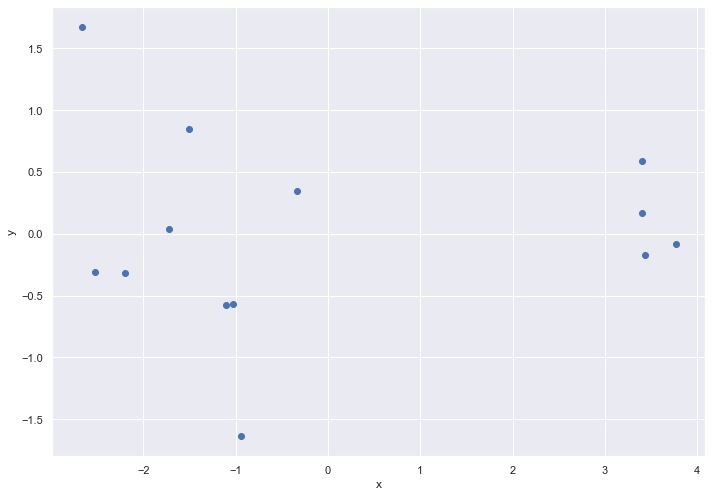

In [178]:
plt.scatter(dr['x'], dr['y'], marker = 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [179]:
K = 3

points = dr.values
kmeans = KMeans(n_clusters=K).fit(points)
centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['x', 'y'])

clusterNum = [i for i in range(K)]
centers['cluster'] = [i for i in range(len(centers))]
centers['type'] = [f'cluster' for dt in clusterNum]
centers

,x,y,cluster,type
0,3.500008,0.125591,0,cluster
1,-2.119034,0.387098,1,cluster
2,-0.851215,-0.609464,2,cluster


In [180]:
kmeans.labels_

array([0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1], dtype=int32)

In [181]:
clustering = dr
clustering['cluster'] = kmeans.labels_
clustering['type'] = ['data' for i in range(len(clustering['x']))]

result = pd.concat([clustering, centers], axis = 0)

result

,x,y,cluster,type
2018-05-07 00:00:00,3.433479,-0.172055,0,data
2018-05-14 00:00:00,3.398709,0.585126,0,data
2018-05-21 00:00:00,3.765697,-0.080917,0,data
2018-05-28 00:00:00,3.402146,0.170209,0,data
2019-03-04 00:00:00,-0.331439,0.344810,2,data
2019-03-11 00:00:00,-1.502086,0.844255,1,data
2019-03-18 00:00:00,-1.718047,0.042367,1,data
2019-03-25 00:00:00,-0.942912,-1.636023,2,data
2019-04-01 00:00:00,-2.517161,-0.306940,1,data
2019-04-08 00:00:00,-1.104295,-0.580297,2,data


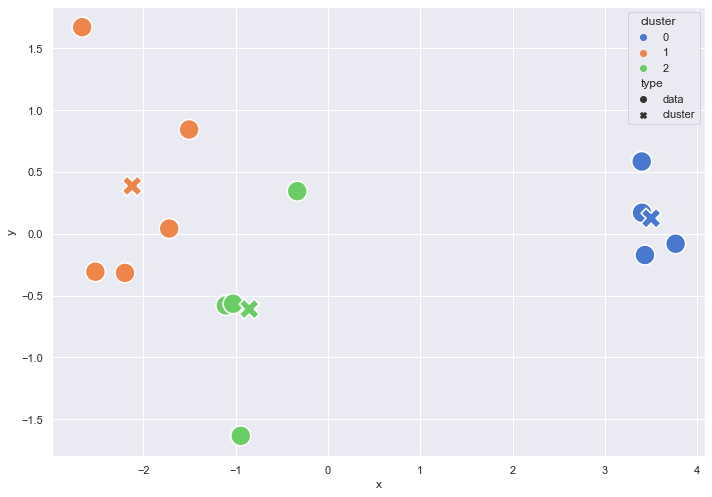

In [182]:
sns.scatterplot(x='x', y="y", 
                hue="cluster", 
                style="type",
                palette="muted",
                s=400,
                data=result)
sns.set(rc={'figure.figsize': (11.7, 8.27)})
rcParams['figure.figsize'] = 11.7,8.27
plt.title = "클러스터링 결과물"
plt.show()

1안 : 일반 적인 그룹핑 데이터
---

<AxesSubplot:>

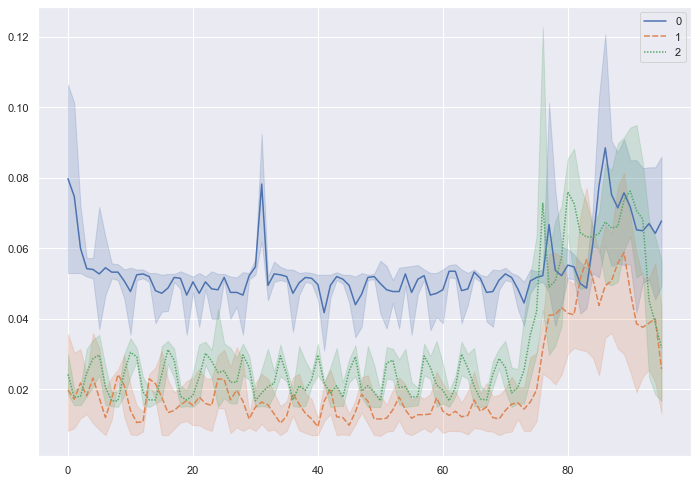

In [183]:
tsCheck = datas[datas.columns.difference(['year', 'month', 'day'])]
tsCheck.reset_index(inplace=True)
del tsCheck['index']
tsCheck = tsCheck.set_index('date')
tsCheck['cluster'] = clustering['cluster']
tsCheck.reset_index(inplace=True)
tsCheck.set_index(['cluster', 'date'], inplace=True)
tsCheck = tsCheck.T
tsCheck
sns.lineplot(data=tsCheck)

2안 : 데이터 전처리 데이터
---

<AxesSubplot:>

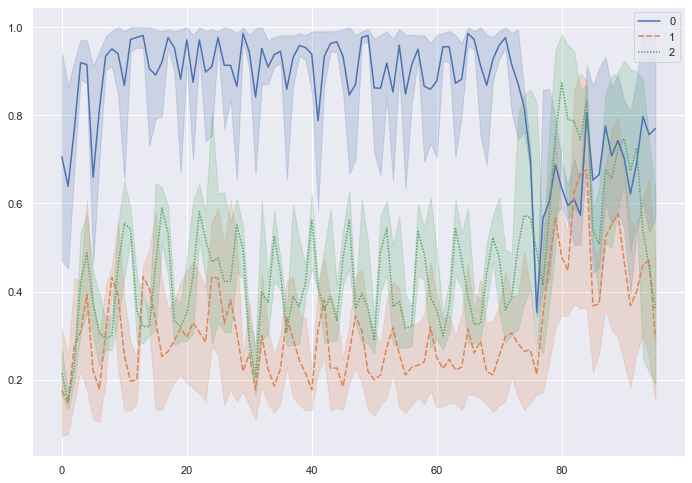

In [184]:
dppCheck = dpp
dppCheck['cluster'] = clustering['cluster']
dppCheck.reset_index(inplace=True)
dppCheck.set_index(['cluster', 'date'], inplace=True)
dppCheck = dppCheck.T
dppCheck
sns.lineplot(data=dppCheck)

In [185]:
'''
Data Structure
{
    date: datetime,
    timeslot: integer,
    cluster: string,
    data: float
}
'''
processingData = [];
for d in tsCheck:
    for idx,t in enumerate(tsCheck[d]):
        processingData.append({
            "date": d[1],
            "timeslot": idx,
            "cluster": f"cluster-{d[0]}",
            "data": t
        })
processingData = pd.DataFrame(processingData)
processingData

,date,timeslot,cluster,data
0,2018-05-07,0,cluster-0,0.100
1,2018-05-07,1,cluster-0,0.117
2,2018-05-07,2,cluster-0,0.078
3,2018-05-07,3,cluster-0,0.052
4,2018-05-07,4,cluster-0,0.051
...,...,...,...,...
1243,2019-04-29,91,cluster-1,0.047
1244,2019-04-29,92,cluster-1,0.046
1245,2019-04-29,93,cluster-1,0.049
1246,2019-04-29,94,cluster-1,0.055


<AxesSubplot:xlabel='timeslot', ylabel='data'>

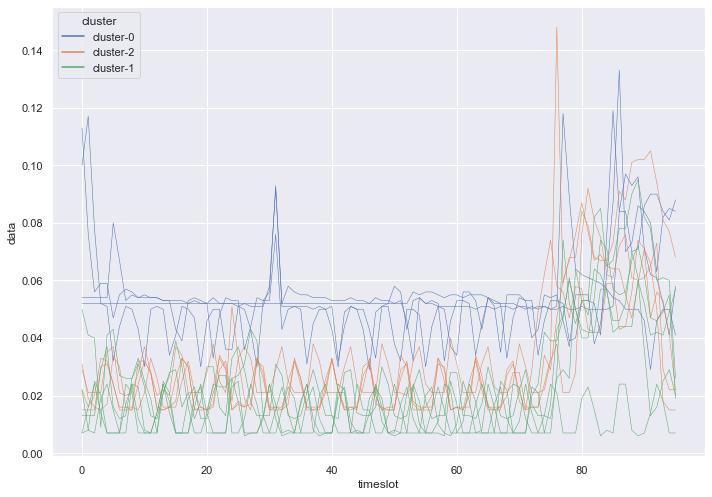

In [186]:
sns.lineplot(data=processingData,
            x="timeslot",
            y="data",
            units="date",
            hue="cluster",
            estimator=None,
            lw=0.5)

<AxesSubplot:xlabel='timeslot', ylabel='data'>

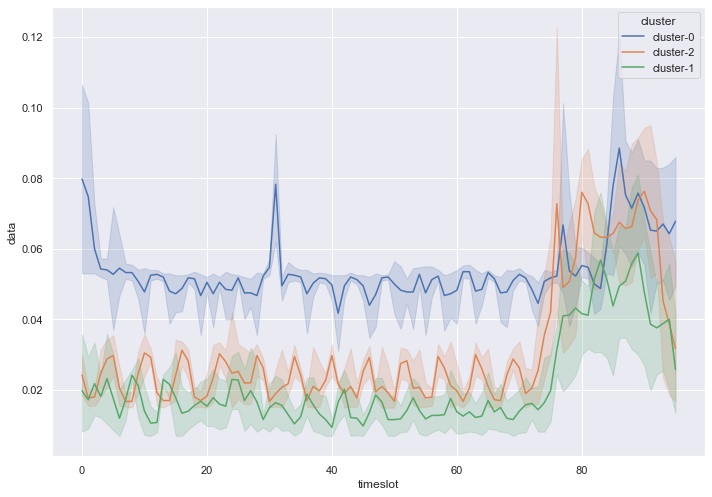

In [187]:
sns.lineplot(data=processingData,
            x="timeslot",
            y="data",
            hue="cluster",)